<head style = "position:absolute; left:0px" class = "lse_header">
    <div style="width: 15%; float:left; height:100px;">
        <img src = "https://www.dropbox.com/s/mz416p4rrm692ed/lse_logo.png?raw=1" style="width: 100px; height: 35px; float:left; margin-top: 30px">
    </div>
    <div style="width: 70%; float:left; height:100px;">
        <h4 style = "text-align:center;margin-top: 30px;">FM442: Quantitative Methods for Finance and Risk Analysis</h4>
    </div>
    <div style="width: 15%; float:left; height:100px;">
        <p style = "text-align:right;margin-top:30px">Jon Danielsson<br>
    Michaelmas Term 2020</p>
    </div>
</head>

<h1 style = "text-align: center; font-size: 36px">Seminar 6</h1>

In this class we will:  

[1. Solve exam-like questions about risk measures](#1)  
[2. Univariate estimate Expected Shortfall and Value-at-Risk using historical simulation](#2)  
[3. Multivariate estimate Expected Shortfall and Value-at-Risk using historical simulation](#3)  
[4. Historical simulation VaR with different estimation windows](#4)   
[5. EWMA VaR](#5)  

___
<a name="1"></a>
## Practice exam questions on Risk Measures

### Question 1 
Write down the mathematical definition of VaR (Value-at-Risk), and derive ES (Expected Shortfall).

#### Solution

VaR is a quantile on the distribution of P/L (profit and loss), so to write down the mathematical definition, we need to use $Q$, the random variable for the P/L on an investment portfolio. The realized value is $q$. So, we can denote the density of the P/L distribuition by $f_q(\cdot)$, and define VaR by:

$$ \textrm{Pr}\ [Q\ \leq -\textrm{VaR}(p)] = p $$

or,

$$p = \int_{-\infty}^{-\textrm{VaR}(p)}f_q(x)dx$$

Expected shortfall is the expected loss conditional on VaR being violated:

$$\textrm{ES} = - E[Q|Q ≤ - \textrm{VaR(p)}]$$

If we write it down in its integral form:

$$\textrm{ES} = \int_{-\infty}^{-\textrm{VaR}(p)} x f_{\textrm{VaR}}(x)dx$$

The tail density, $f_{\textrm{VaR}}(\cdot)$ is given by:

$$1 = \int_{-\infty}^{-\textrm{VaR}(p)} f_{\textrm{VaR}}(x)dx\ =\ \frac{1}{p}\ \int_{-\infty}^{-\textrm{VaR}(p)} f_{q}(x)dx$$


### Question 2
What is a coherent risk measure?

#### Solution

Consider two real-valued random variables: $X$ and $Y$. A function $\varphi(\cdot): X,Y \rightarrow \mathbb{R}$ is called a **coherent** risk measure if it satisfies for $X$, $Y$, and constant $c$:

$\textrm{(a) Monotonicity}$
$$\textrm{if}\ X, Y \in V\ \textrm{and}\ X \leq Y,\ \textrm{then},\ \varphi(X) \geq \varphi(Y)$$

$\textrm{(b) Subadditivity}$
$$\textrm{if}\ X, Y, (X+Y) \in V,\ \textrm{then},\ \varphi(X+Y) \leq \varphi(X) + \varphi(Y)$$

$\textrm{(c) Positive homogeneity}$
$$\textrm{if}\ X \in V\ \textrm{and}\ c > 0,\ \textrm{then},\ \varphi(cX) = c\varphi(X)$$

$\textrm{(d) Translation invariance}$
$$\textrm{if}\ X \in V\ \textrm{and}\ c \in \mathbb{R},\ \textrm{then},\ \varphi(X + c) = \varphi(X) - c$$

### Question 3
Suppose you own two assets, A and B, with payoffs that are independent of each other. Each asset returns either 0 with probability 0.9, or -100 with probability 0.1. Is VaR(5%) sub-additive?

#### Solution

First let's consider only one of the assets, say asset A. With probability 10%, losses would be 100, and with probability 90%, losses would be 0. We can directly calculate the VaR of the single asset as:

VaR for A is:
$$\textrm{VaR}^{5\%}(A) = 100$$
$$\textrm{VaR}^{15\%}(A) = 0$$

Now let's consider a owning one unit of asset A and one unit of asset B, so returns are (0.5A + 0.5B). We have a portfolio with two assets with independent payoffs. Each asset has two possible realizations, which means our portfolio has four possible payoffs. We can build a table with these payoffs and their corresponding probabilities:

| Asset A | Asset B | Portfolio Return |   Probability    |
| :-------: | :-------: | :-------: | :-------: |
|  0  |   0   |   0   |    (0.9) * (0.9) = 0.81    |
|  -100  |   -100   |   -200   |    (0.1) * (0.1) = 0.01    |
|  0  |   -100   |   -100   |    (1 - 0.81 - 0.01) / 2 = 0.09   |
|  -100  |   0   |   -100   |    (1 - 0.81 - 0.01) / 2 = 0.09   |


If we order the possible portfolio returns and look for the 5% quantile, it will be the case where one asset incurs in a loss and the other does not. so $\textrm{VaR}^{5\%}(A+B) = 100$.

Hence:

$$\textrm{VaR}^{5\%}(A+B) = 100 \leq \textrm{VaR}^{5\%}(A) + \textrm{VaR}^{5\%}(B) = 200$$

So, VaR(5%) is subadditive.


### Question 4
Consider the asets in the last question. Is VaR(15%) sub-additive?

#### Solution

If we are considering a single asset, there is only a 10% probability of a loss of -100. This means that any VaR with probability larger than 10% will be equal to zero:

$$\textrm{VaR}^{15\%}(A) = \textrm{VaR}^{15\%}(B) = 0$$

For the case of the portfolio, ordering the possible returns in the table from Question 3 shows us that with a 15% probability, we would still be in the situation where one asset incurs in losses while the other does not, which means: 

$$\textrm{VaR}^{15\%}(A + B) = 100$$

Since the VaR of the portfolio is larger than the sum of the individual VaRs, VaR(15%) fails to meet subadditivity.

### Question 5
Give one example of a traded asset that could lead to a sub-additivity violation of VaR, carefully explaining why the payoff structure of this asset would lead to that conclusion.

#### Solution
An asset that most of the time has a return of zero, but occasionally very negative. This could be the exchange rate of a country with a peg, that occasionally devalues, short deep out of the money option or junk bonds. 

The payoff structure of these type of assets can resemble the one discussed in Question 3, which means that by diversifying, you can have a positive VaR for a probability that would give you a VaR of 0 if you were considering a single asset.

### Question 6
Suppose you own 1 million USD worth of both stocks A and B. Stock A is a small cap stock, with a market capitalization of 3 million, while stock B is a large cap stock, with a market capitalization of 3 billion. As a consequence, one of the axioms of a coherent risk measure is likely to be violated for VaR on one of the stocks but not the other. Which stock is it and why would that be the case?

#### Solution
This question is about the positive homogeneity property of risk measures:
$$c \times Risk(A) = Risk(c\times A)$$
for an asset $A$ and constant $c$. 

It is very different owning 1 million USD worth of a stock with a total market capitalization of 3 million, or a stock with total market capitalization of 3 billion. In the first case, we have a big influence on the price of the stock. If we decide to sell all our holdings, the price will go down as we do. This means we will not be getting the same amount of money for each dollar worth of stock we sell. In the case of the large capitalization company, our holdings are a small share of the total (less than 1%), so it is unlikely that any transaction we do will have a large impact on the stock price. 

So, positive homogeneity is likely to hold for the big capitalization firm, but not for the small one.


### Question 7
State the three steps in VaR calculations.

#### Solution
(a) To specify probability $p$. Commonly used are VaR levels of 1% - 5%, but it is mainly determined by how the risk managers wishes to interpret the VaR number.

(b) To decide holding periods, commonly 1 day, but it can vary depending on different circumstances.

(c) Identification of probability distribution of the profit and loss of the portfolio.

___
<a name="2"></a>
## Estimating VaR and ES with historical simulation - Univariate

Historical simulation is a non-parametric method to implement risk measures. It assumes that the past is a sufficient predictor for the future, so in other words, that "history repeats itself". It uses the quantiles of the empirical disitribution of returns. The procedure to implement it for estimating VaR is:

* Decide on a probability, $p$, e.g. 1%
* Have a sample of returns, $y$, with length $T$, e.g. 1000 days (for multi-assets, you can treat $y$ as the portfolio returns)
* Sort the $y$ from smalles to largest, call that $ys$
* Take the $(T \times p)^{th} = (1000 \times 0.01)^{th}$ smallest value of $ys$, call that $ys_{T \times p} = ys_{10}$
* If you own one stock, and $P_{t-1}=1$, then VaR is the $10^{th}$ smallest return, i.e.
$$VaR_t = -ys_{10}$$
* Otherwise, you have to multiply that by the number of stocks you own, and their $t-1$ price:
$$VaR_t = -ys_{10} P_{t-1} \textrm{number of stocks}$$

To implement it for ES:

* Take the mean of all observations that violate VaR
* For example, for the previous case:
$$\textrm{ES} = \frac{1}{10} \sum_{i=1}^{10} ys_i$$

#### Portfolio Value

We will use the term _portfolio value_ to denote the monetary value of a portfolio. For example, if we own 100 stocks, each worth 10 USD, the value of our portfolio is of 1000 USD. We can extend this idea to a portfolio with different assets. If we have 5 stocks of A, each worth 10 USD, and 20 stocks of B, each worth 2 USD, the value of our portfolio is: (5)(10) + (20)(2) = 90 USD.

### Implementing VaR and ES for General Electric

We will use historical simulation to esimate VaR and ES for the returns of General Electric:

In [1]:
# Implementing HS to estimate VaR and ES

# Load the data
load("Y.RData")

# Extract the returns for GE
y <- Y$GE

# View them
head(y)

[1]  0.034289343 -0.001874756 -0.005644903 -0.009478782  0.005697737
[6] -0.021053069

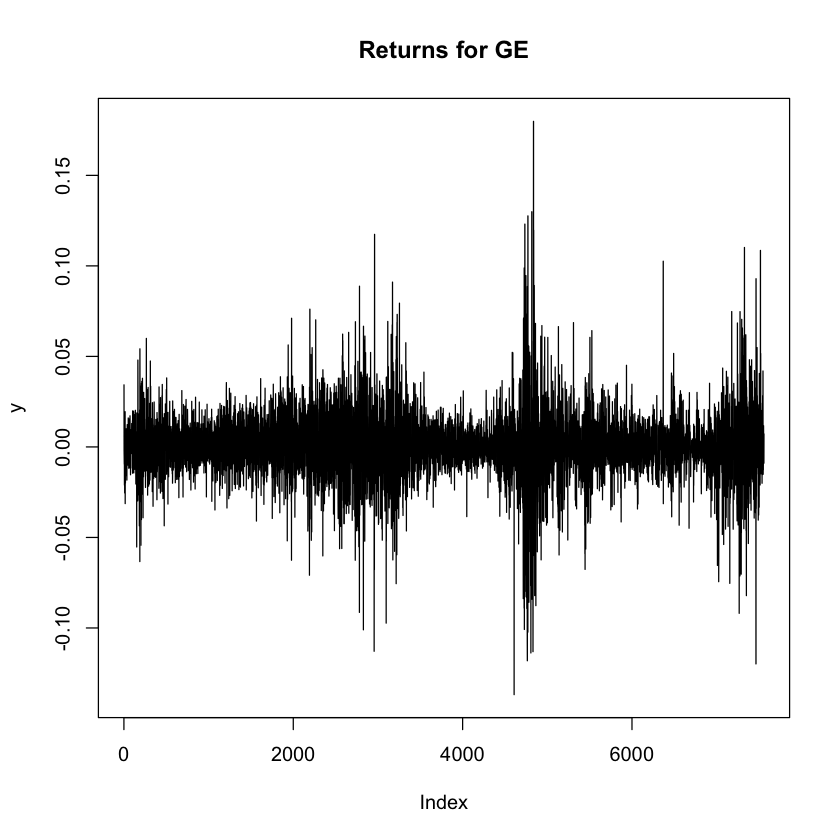

In [2]:
# Plot the returns
plot(y, type = "l", main = "Returns for GE")

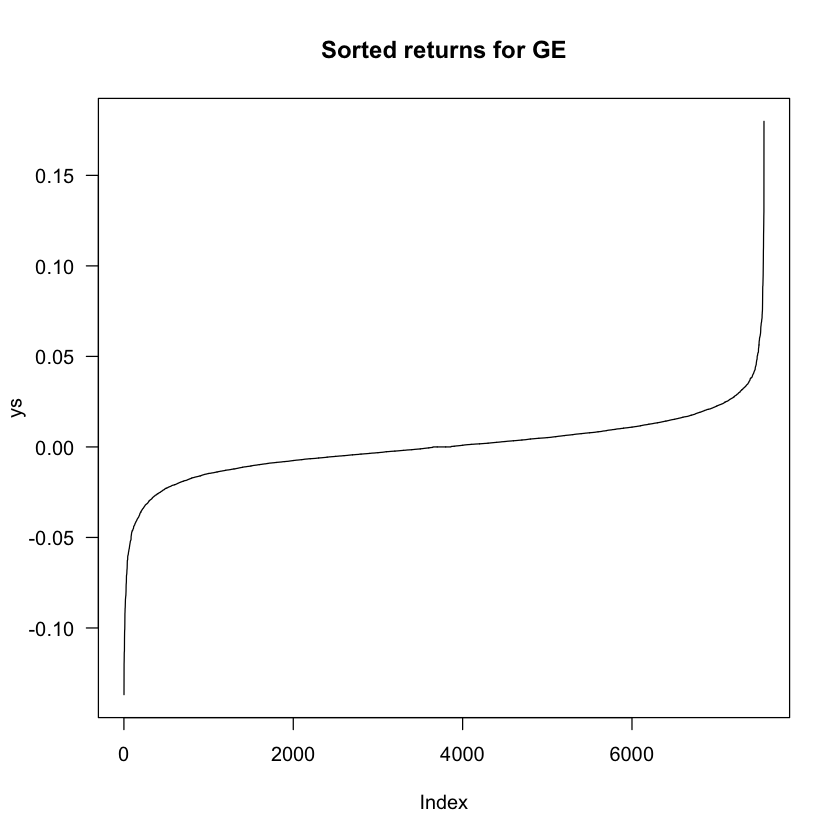

In [3]:
# Specify the probability p
p <- 0.05

# Assume we have a portfolio value of 1000 USD
portfolio <- 1000

# Sort the values in y using sort()
ys <- sort(y)

# Plot them
plot(ys, type = "l", main = "Sorted returns for GE", las = 1)

In [4]:
# Number of observations
n <- length(y)

# Get the 5% quantile by multiplying the length times p
n * p

[1] 377.95

Since this number is not an integer, it is a good practice to round it up. If we round it down, we are not meeting the required probability, since the element in the 377th position has a quantile lower than 5%. By rounding up and using the element in the 378th position, we guarantee to be covering the 5% quantile. We can use the function `ceiling()` for this:

In [5]:
# Round up
quant <- ceiling(n*p)
quant

[1] 378

Now we search for the 387th element in the sorted vector `ys`:

In [6]:
# Find the 378th element in ys
ys[quant]

[1] -0.02656679

We can visually see this in the plot for the sorted list:

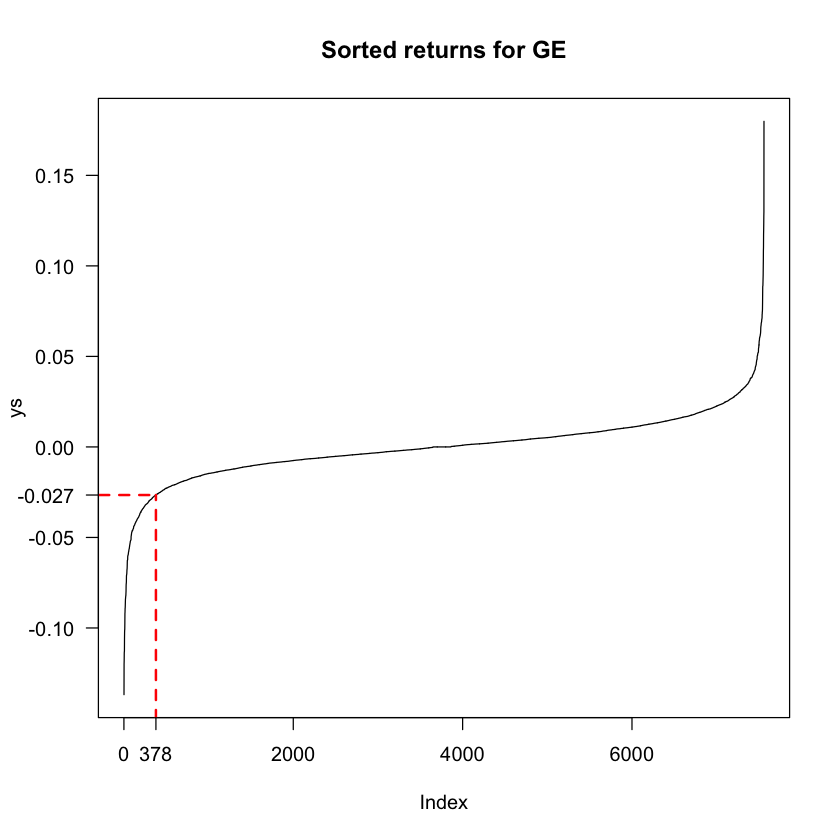

In [7]:
# Visually finding the 5% quantile
plot(ys, type = "l", main = "Sorted returns for GE", las = 1)

# Adding the segments
segments(x0 = quant, y0 = -0.5, y1 = ys[quant], lty = "dashed", lwd = 2, col ="red")
segments(x0 = -1000, y0 = ys[quant], x1 = quant, lty = "dashed", lwd = 2, col ="red")

# Adding ticks
axis(1, at = quant, label = quant)
axis(2, at = ys[quant], label = round(ys[quant],3), las = 1)

In order to calculate VaR, we multiply this return by the portfolio value, with a minus sign in front since it is a loss:

In [8]:
# Use it to calculate VaR, scaling for the portfolio value
VaR <- -ys[quant] * portfolio
VaR

[1] 26.56679

To calculate the ES, we take the mean of returns conditional on VaR being violated, and scale this to the portfolio size. In other words

In [9]:
# For ES, we get the mean of observations up to the 5th quantile
ES <- -mean(ys[1:quant]) * portfolio
ES

[1] 42.9324

In [10]:
# Report our findings:
cat("We have", length(y), "observations on GE", "\n",
 p , "VaR is", VaR, "and ES is", ES, "on portfolio worth $", portfolio, "\n")

We have 7559 observations on GE 
 0.05 VaR is 26.56679 and ES is 42.9324 on portfolio worth $ 1000 


A direct way to find the quantile of an empirical distribution is using the `quantile()` function on the returns. But bear in mind that if the quantile index is not integer, it will output a weighted average between the rounded-up and rounded-down values. By calling `quantile(y,0.05)` we see a small difference:

In [11]:
# Doing HS with the quantile() function
quant2 <- quantile(y,0.05)
quant2

# VaR
VaR <- -quant2*portfolio

cat("5% VaR is:", VaR)

5% 
-0.02656032

5% VaR is: 26.56032

___
<a name="3"></a>
## Estimating VaR and ES with historical simulation - Multivariate

The multivariate extension to HS is quite straightforward. We use the matrix of returns and a vector of weights to create a time series vector of portfolio returns, and treat it as if it were a single asset. In this section we will estimate VaR through HS for General Electric and Citigroup:

In [12]:
# HS for GE and C

# Get the returns from GE and C and transform into a matrix
y <- as.matrix(Y[,c("GE", "C")])

# Create a vector of portfolio weights, here we will split the stocks halfway
w <- c(0.5, 0.5)

# Multiply the matrix y (dimension Tx2) by the vector w (dimension 2x1)
# Output yp is portfolio returns, dimension (Tx1)
yp <- y %*% w
head(yp)

0.0322647333
0.0054052226
-0.0091650097
-0.0005018982
0.0070506639
-0.0168422553


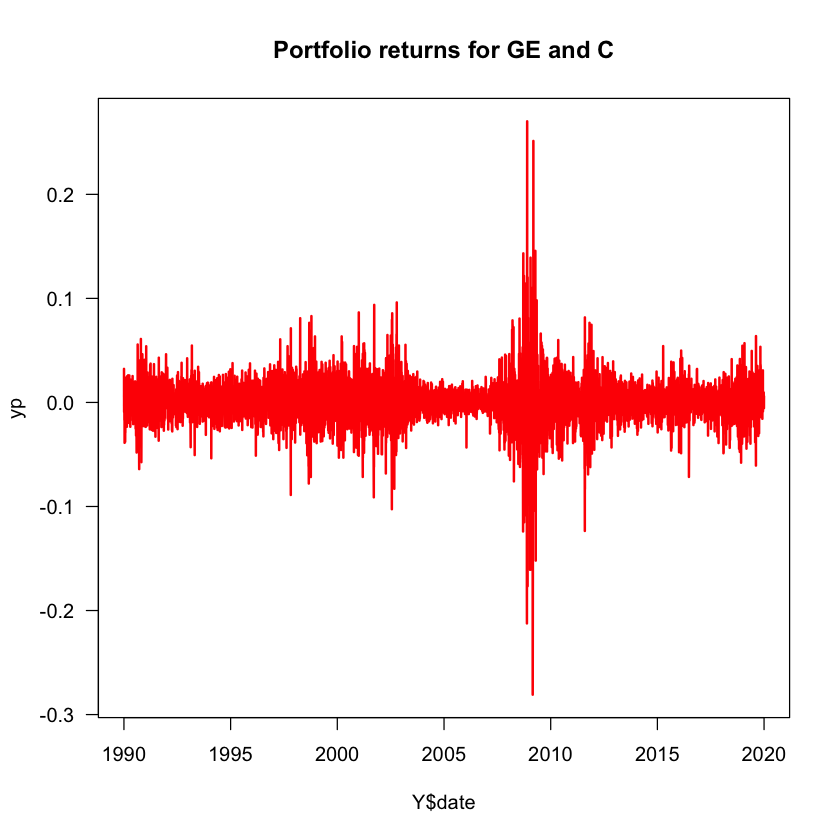

In [13]:
# Plot the portfolio returns
plot(Y$date, yp, main = "Portfolio returns for GE and C", type = "l", las = 1, lwd = 2, col = "red")

In [14]:
# Get VaR and ES

# Sort the vector
ys <- sort(yp)

# Get the length
n <- length(ys)

# Get the position of 5% quantile
quant <- ceiling(n*p)

# VaR
VaR <- -ys[quant]*portfolio

# ES 
ES <- -mean(ys[1:quant]) * portfolio

cat("We have", length(ys), "observations on the portfolio", "\n",
 p , "VaR is", VaR, "and ES is", ES, "on portfolio worth $", portfolio, "\n")

We have 7559 observations on the portfolio 
 0.05 VaR is 27.43663 and ES is 47.02372 on portfolio worth $ 1000 


___
<a name="4"></a>
## Historical simulation VaR with different estimation windows

### Out-of-sample forecasting and estimation windows
We usually use a fixed estimation window to do a one-day-ahead VaR forecast recursively. For example, we can the data from day 1 to day 1000 to forecast VaR for day 1001. This is an **out-of-sample** forecast, since the data we are using only comprises days 1 to 1000, but we are doing a forecast for day 1001, which is not in our sample. Then we will move one period ahead and use data from day 2 to day 1001 to forecast VaR for day 1002 and so on. The _estimation window_, denoted by $W_E$ is how many days we include in the sample to forecast for one day ahead. In the example just mentioned, the estimation window is 1000 days.

Assume we have a total of $T$ data points. After we are doing with this recursive one-day-ahead forecasting, we will have made $T-W_E$ forecasts.

### Implementation

Let's work again with the returns of General Electric and use a fixed estimation window of 1000 days. We will need to implement a for-loop to get the VaR estimation for each day between days 1001 and the length of the dataset.

In [15]:
# Historical simulation with fixed estimation window
y <- Y$GE
window <- 1000
p <- 0.05
n <- length(y)
portfolio_value <- 1000

# Initialize and empty vector to hold VaR forecasts
VaR <- vector(length = (n - window))

# Loop to calculate one VaR per day
for (i in 1:(n-window)) {
    ys <- sort(y[i:(i+window)])
    quant <- ceiling(p*length(ys))
    VaR[i] <- -ys[quant]*portfolio_value
}

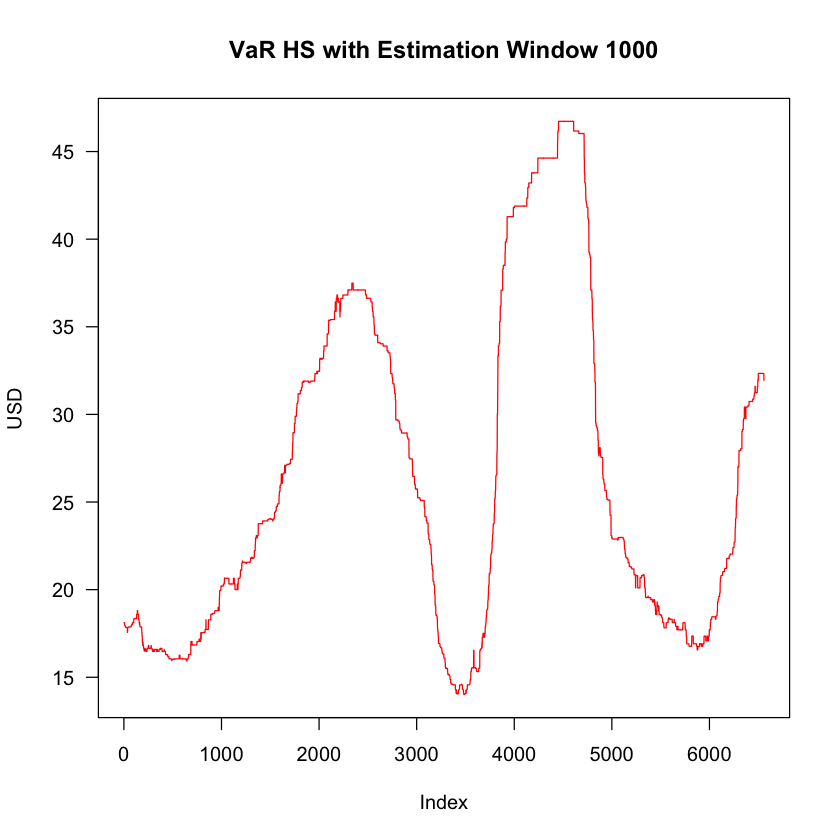

In [16]:
# Plot it
plot(VaR, type = "l", main = "VaR HS with Estimation Window 1000",
    col = "red", las = 1, ylab = "USD")

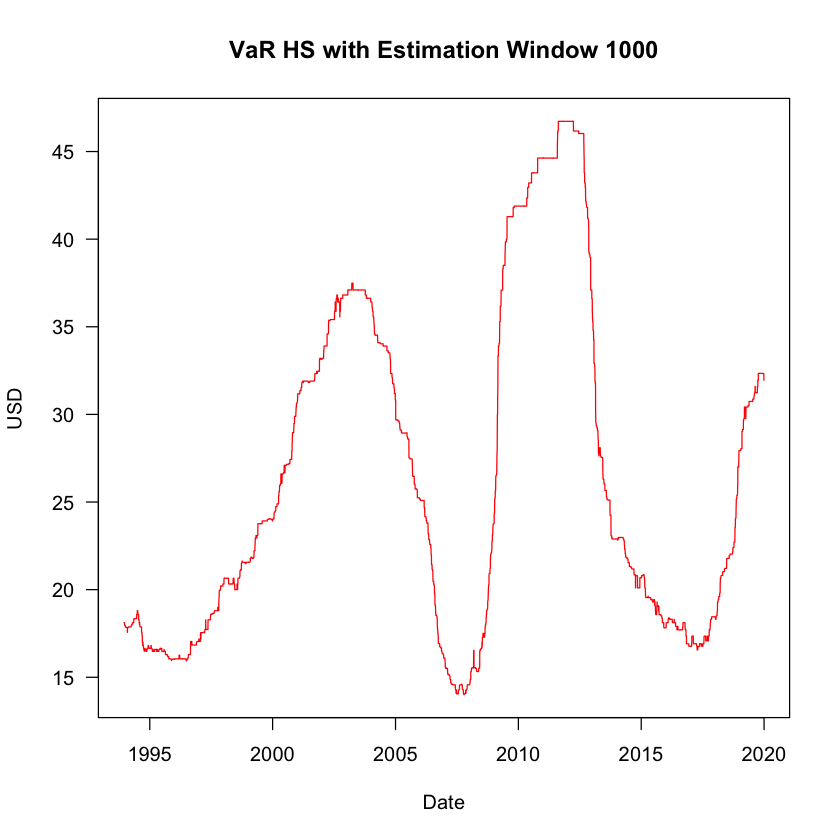

In [17]:
# We should add the dates in the x-axis
# Notice we have to exclude the first 1000 days
dates_var <- Y$date[-1:-1000]

# Plot again
plot(dates_var, VaR, type = "l", main = "VaR HS with Estimation Window 1000",
    col = "red", las = 1, ylab = "USD", xlab = "Date")

### Different Estimation Windows

We have used a fixed estimation window of 1000 days. To see the effect of changing the estimation window, we will reproduce this exercise using estimation windows of 100, 500, 1000 and 5000 days:

In [18]:
windows <- c(100, 500, 1000, 5000)
which(windows == 100)

[1] 1

In [19]:
# Using four different estimation window sizes
windows <- c(100, 500, 1000, 5000)

# Create an empty data frame to fill with the forecasts
HS <- data.frame(HS100 = numeric(),
                HS500 = numeric(),
                HS1000 = numeric(),
                HS5000 = numeric())

# Do a loop for every element of windows
for (window in windows) {
    
    # Perform a daily HS VaR
    for (i in 1:(n-window)) {
        
        # Sort the returns for the respective estimation window
        ys <- sort(y[i:(i+window)])
        
        # Get the quantile
        quant <- ceiling(p*length(ys))
        
        # Allocate the result to the corresponding column of HS
        # Use which() to find the index of the window and allocate to that column
        column <- which(windows == window)
        HS[i+window, column] <- -ys[quant]*portfolio_value
    }
}


Now that we have implemented HS VaR for four different estimation windows, we can compare them. We need to be careful in this step because each model has a different number of forecasts, given that the number of observations used is different. We should always focus on the time frame of the most restrictive model, in this case, the one using an estimation window of 5000 observations.

Let's plot all of them together:

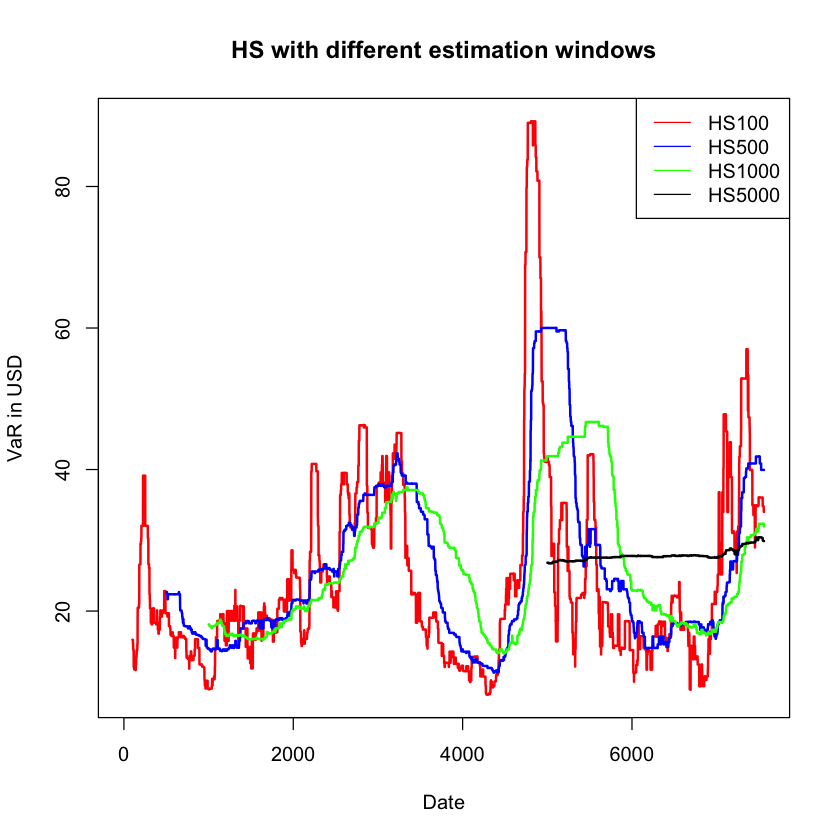

In [20]:
# Plotting the forecasts
plot(HS$HS100, main = "HS with different estimation windows", ylab = "VaR in USD",
    xlab = "Date", type = "l", col = "red", lwd = 2)
lines(HS$HS500, col = "blue", lwd = 2)
lines(HS$HS1000, col = "green", lwd = 2)
lines(HS$HS5000, col = "black", lwd = 2)

legend("topright", legend = names(HS), lty = 1, col = c("red", "blue", "green", "black"))

For a better comparison, let's restrict our attention to the time frame where we have forecasts for each model. This consists of the length of the data minus the largest estimation window. Also, we will add dates:

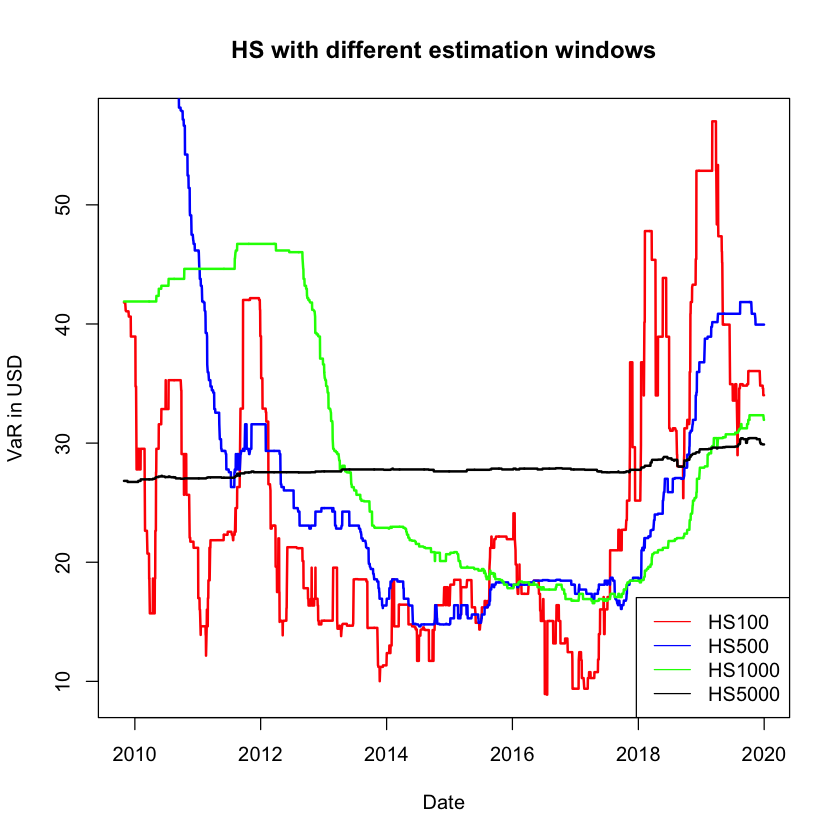

In [21]:
# Subset HS to keep only the observations that fit the most restrictive estimation window
HS <- HS[(max(windows)+1):n,]
# Extract the dates to use
dates <- Y$date[(max(windows)+1):n]

# Plotting them all together
plot(dates, HS$HS100, main = "HS with different estimation windows", ylab = "VaR in USD",
    xlab = "Date", type = "l", col = "red", lwd = 2)
lines(dates,HS$HS500, col = "blue", lwd = 2)
lines(dates,HS$HS1000, col = "green", lwd = 2)
lines(dates,HS$HS5000, col = "black", lwd = 2)

legend("bottomright", legend = names(HS), lty = 1, col = c("red", "blue", "green", "black"))

Let's compute the means for each forecast:

In [38]:
# Means
colMeans(HS)

HS100    HS500   HS1000   HS5000 
24.08529 27.85467 29.06558 27.88205

And the standard deviations:

In [23]:
# Standard deviations
sd(HS$HS100)
sd(HS$HS500)
sd(HS$HS1000)
sd(HS$HS5000)

[1] 11.06707

[1] 13.3575

[1] 11.05324

[1] 0.7888006

Intuitively, the most extreme observations, which are the ones that determine our forecast, fluctuate a lot more than observations that are less extreme. so, the bigger the sample size used as estimation window, the more precise the estimation of HS VaR should be. However, the downside is that old data may not be at all representative. In the plot we see that with an estimation window of 5000 days, the forecast is basically flat, and it fluctuates more the smaller the estimation window is, even if the mean does not vary much.

## Using a function to do historical simulation

When implementing HS VaR for different estimation windows, the best way to proceed is to create a function that takes a dataset, a probability, a portfolio value, an estimation window, and builds a forecast:

In [24]:
# Creating a HS VaR forecast function

DoHS <- function(y, probability = 0.05, portfolio_value = 1, WE = 1000){
    # HS function that takes as argument:
    # y: A vector of returns, ordered by date
    # probability: The probability to be used for VaR - Default 5%
    # portfolio_value: The portfolio value - Default 1
    # WE: Estimation window for the forecast - Default 1000 days
    
    # To calculate elapsed time, first get the current time
    old <- Sys.time()
    
    # Print message
    cat("Doing Historical simulation VaR forecast", "\n",
       "Estimation window:", WE, "\n",
       "Number of observations:", length(y), "\n",
       "VaR probability:", probability, "\n",
       "Portfolio value:", portfolio_value)
    
    # Number of observations
    n <- length(y)
    
    # Initialize empty VaR vector
    VaR <- rep(NA, n)
    
    # Do a loop for the forecast
    for (i in 1:(n-WE)){
        
        # Sort the returns for the estimation window
        ys <- sort(y[i:(i+WE-1)])
        
        # Get the quantile position, using ceiling to round up
        quant <- ceiling(probability * length(ys))
        
        # Allocate the VaR forecast in the vector
        VaR[i+WE] <- -ys[quant]*portfolio_value
    }
    
    # Get the new time and print the elapsed time
    time <- Sys.time() - old
    cat("\n", "Elapsed time:", round(time,4), "seconds")
    
    # Return the VaR vector
    return(VaR)
}

Now we can use `DoHS()` to automatically create a HS VaR forecast for the estimation window we specify. 

Let's do a forecast using the estimation windows of 300, 1000 and 2000 days for the returns of Microsoft:

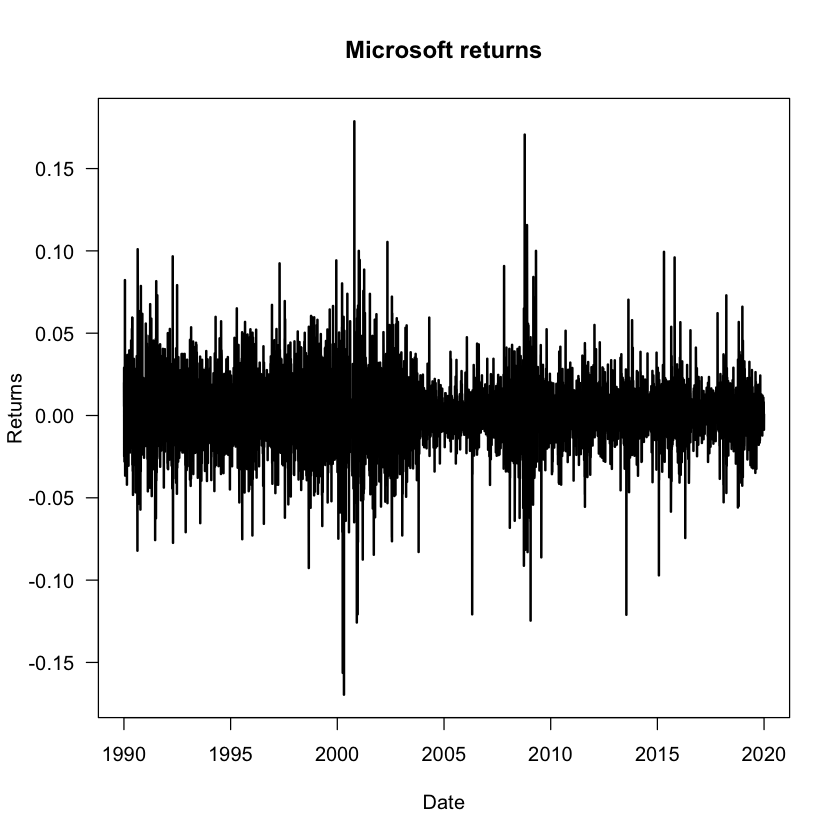

In [25]:
# Loading the returns for Microsoft
y <- Y$MSFT
dates <- Y$date

# Plot the returns
plot(dates, y, main = "Microsoft returns", type = "l", lwd = 2, las = 1,
    xlab = "Date", ylab = "Returns")

In [26]:
# Historical Simulation with an estimation window of 300 days
HS300 <- DoHS(y, probability = p, portfolio_value = portfolio_value, WE = 300)

Doing Historical simulation VaR forecast 
 Estimation window: 300 
 Number of observations: 7559 
 VaR probability: 0.05 
 Portfolio value: 1000
 Elapsed time: 0.34 seconds

In [27]:
# Historical Simulation with an estimation window of 1000 days
HS1000 <- DoHS(y, probability = p, portfolio_value = portfolio_value, WE = 1000)

Doing Historical simulation VaR forecast 
 Estimation window: 1000 
 Number of observations: 7559 
 VaR probability: 0.05 
 Portfolio value: 1000
 Elapsed time: 0.4065 seconds

In [28]:
# Historical Simulation with an estimation window of 2000 days
HS2000 <- DoHS(y, probability = p, portfolio_value = portfolio_value, WE = 2000)

Doing Historical simulation VaR forecast 
 Estimation window: 2000 
 Number of observations: 7559 
 VaR probability: 0.05 
 Portfolio value: 1000
 Elapsed time: 0.5809 seconds

We can plot the three forecasts using `matplot()`:

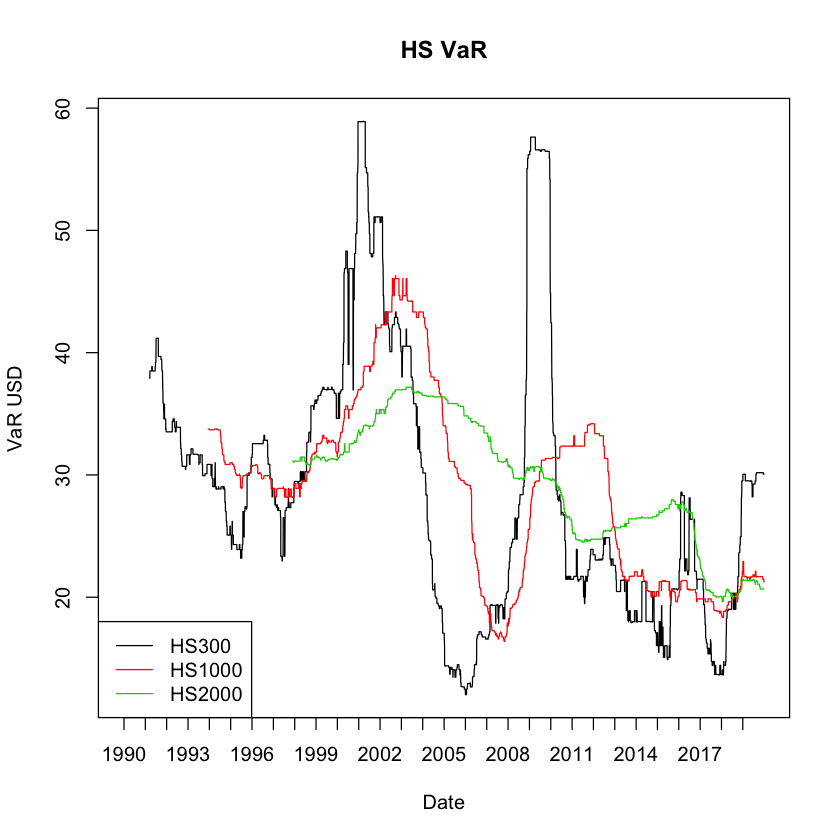

In [29]:
# Bind HS into a matrix
HS_VaR <- cbind(HS300, HS1000, HS2000)

# Plot and modify axis to include dates
matplot(dates, HS_VaR, type = "l", lty = 1, col = 1:3, xaxt = "n", main = "HS VaR", xlab = "Date", ylab = "VaR USD")
axis.Date(1, at = seq(min(dates), max(dates), by = "years"))

# Legend
legend("bottomleft", legend = colnames(HS_VaR), lty = 1, col = 1:3)

___
<a name="5"></a>
## EWMA VaR

We can use the estimated conditional volatility from an EWMA model, $\hat{\sigma}_t$, to forecast VaR:

$$\textrm{VaR}_t(p) = -\hat{\sigma}_t F_{R}^{-1}(p)\ \vartheta$$

Where $p$ is the specified VaR probability, $F_{R}^{-1}(\cdot)$ is the inverse of the cdf of returns, and $\vartheta$ is the portfolio value.

The minimum estimation window to implement our EWMA is 30 days. In our implementation, this will be the _Burn time_. We initialize the EWMA model with the sample covariance as the value for the first time period. The effect of a given conditional covariance from a past period quickly dies out as time passes, because $\lambda^n \rightarrow 0$ as $n \rightarrow \infty$, so the effect of initializing the EWMA matrix with the unconditional covariance will not be a problem after a few time periods. The rule of thumb is to _burn_ the first $W_E$ observations, usually taken as 30 days.

Let's implement this model to the Microsoft returns:

In [30]:
# Implementing EWMA VaR

# Specifying the parameters for VaR
p <- 0.05
portfolio_value <- 1000

# Specifying the parameters for EWMA
lambda <- 0.94
n <- length(y)
BurnTime <- 30

# Vector to store estimated conditional volatility
EWMA_Variance <- rep(NA, length = n)

# First value is the sample variance
EWMA_Variance[1] <- var(y)

# See the vector
head(EWMA_Variance)

[1] 0.0003950531           NA           NA           NA           NA
[6]           NA

Now that we have created the EWMA vector and used the sample variance to fill the first value, we can use a _for_ loop to run the EWMA model:

In [31]:
# Run the EWMA model using a for loop
for (i in 2:n) {
    EWMA_Variance[i] <- lambda * EWMA_Variance[i-1] + (1-lambda) * y[i-1]^2
}

Since we initialized the EWMA matrix using the unconditional sample variance, we _burn_ the data in the estimation window $W_E = 30$. 

In [32]:
# Replacing the data in the estimation window to NA
EWMA_Variance[1:BurnTime] <- NA

We can plot the square root of `EWMA_Variance` to see our estimation for conditional volatility:

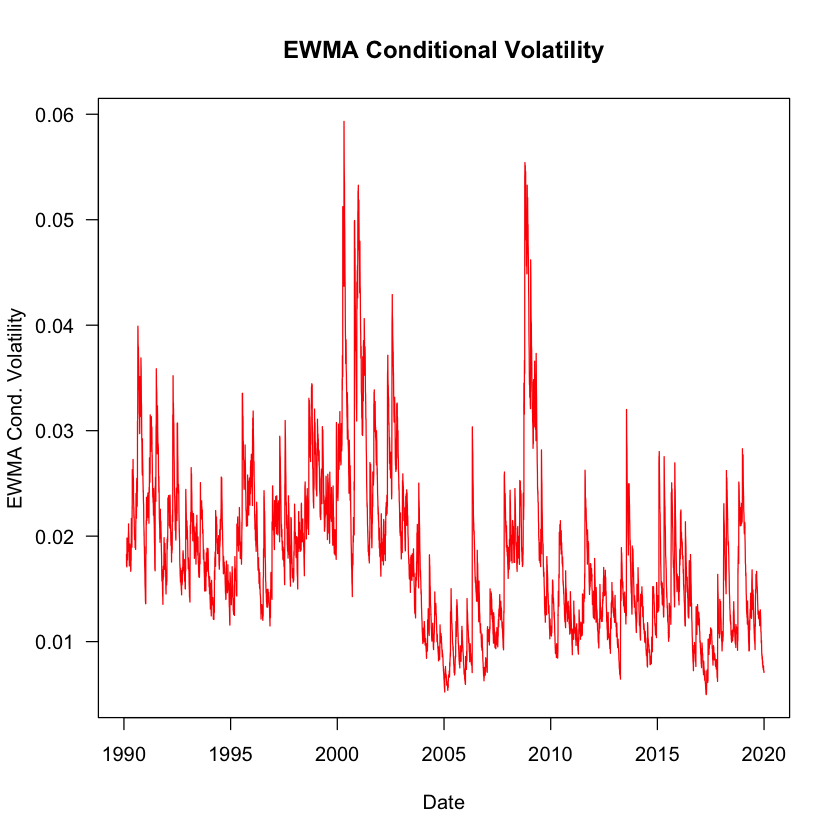

In [33]:
# Plot estimation for conditional volatility
EWMA_cond_volatility <- sqrt(EWMA_Variance)
plot(dates, EWMA_cond_volatility, type = "l", main = "EWMA Conditional Volatility",
    las = 1, col = "red", xlab = "Date", ylab = "EWMA Cond. Volatility")

To forecast VaR, we need to assume a conditional distribution for the returns. We will assume conditional normality:

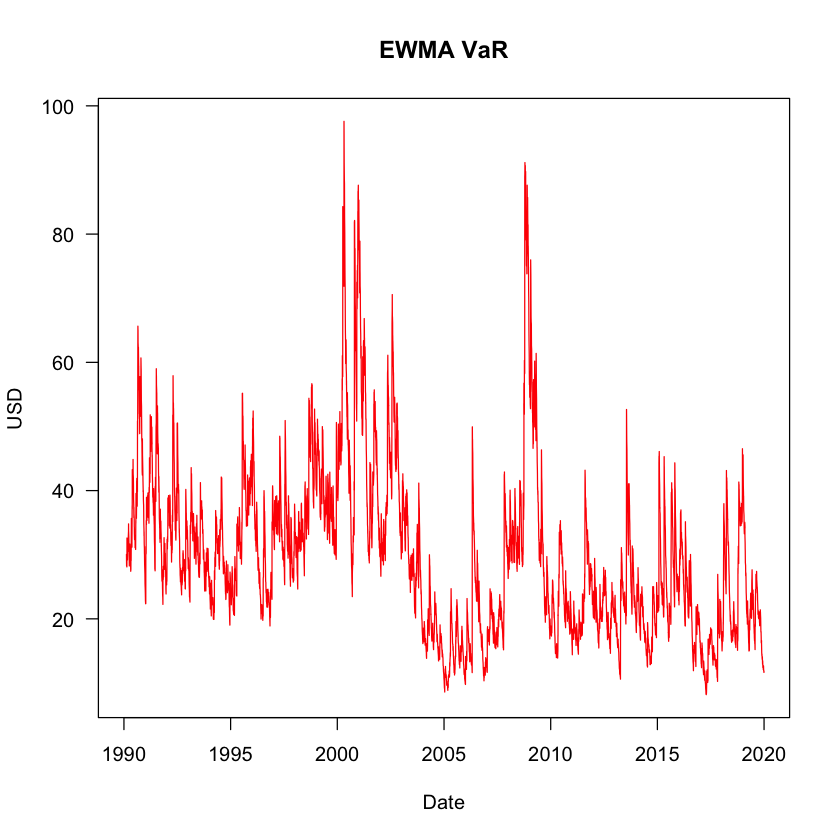

In [34]:
# Implementing the VaR forecast
EWMA_VaR <- -qnorm(p) * EWMA_cond_volatility * portfolio_value

# Plotting it
plot(dates, EWMA_VaR, type = "l", main = "EWMA VaR",
    las = 1, col = "red", xlab = "Date", ylab = "USD")

We will continue working with these models in the next seminar, so let's save the VaR forecasts for the historical simulation and EWMA in a dataframe called VaR:

In [35]:
# Storing the data
VaR <- cbind(HS_VaR, EWMA_VaR)
VaR <- as.data.frame(VaR)
save(VaR, file = "VaR.RData")

## Recap

In this seminar we have covered:

* Review questions on risk measures
* Univariate historical simulation
* Multivariate historical simulation
* VaR forecasting with historical simulation
* Implementing historical simulation with different estimation windows
* Implemented EWMA VaR

Some new functions used:

* `segments()`
* `colMeans()`

* `DoHS()`

For more discussion on the material covered in this seminar, refer to _Chapter 4: Risk measures_ and _Chapter 5: Implementing risk forecasts_ on _Financial Risk Forecasting_ by Jon Danielsson.

<small> Acknowledgements: Thanks to Alvaro Aguirre for creating these notebooks</small>  
<small> © Jon Danielsson, 2020 </small>